# Premier League Minutes Played Analysis

This notebook performs two main tasks:

1. Scrape Premier League player data from FBRef and save it as a CSV file.
2. Load the CSV file and analyze top players by minutes played

In [1]:
# Import for scraping and analysis

import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scraping Section

In [2]:
#Target URL
url = "https://fbref.com/en/comps/9/stats/Premier-League-Stats"

#Step 1: Download the page
res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')

#Step 2: Extract HTML comments containing the tables
comments = soup.find_all(string=lambda text: isinstance(text, Comment))

#Step 3: Search for the correct table in the commented HTML
table = None #Define the variable before the loop

for comment in comments:
	comment_soup = BeautifulSoup(comment, 'lxml')
	tables = comment_soup.find_all('table', id='stats_standard')
	if tables:
		table = tables[0]
		break

#Step 4: Check if table was found
if table is None:
	print("Could not find the 'stats_standard' table inside comments.")
else:

	#Step 5: Convert the table into a DataFrame
	df = pd.read_html(str(table), header=0)[0] #multi-index header
	df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
	#Step 6: Clean up repeated headers or rank column
	if 'Rk' in df.columns:
		df = df[df['Rk'] != 'Rk'] #Remove repeated header rows
		df.drop(columns=['Rk'], inplace=True)
		df.reset_index(drop=True, inplace=True)

	#Step 7: Save it as CSV
	df.to_csv("data/premier_league_standard_stats.csv", index=False)
	print("Scraped and saved: premier_league_standard_stats.csv")


Scraped and saved: premier_league_standard_stats.csv


/tmp/ipykernel_9509/448143647.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table), header=0)[0] #multi-index header


# Analysis Section

In [3]:
# Load and clean data
df = pd.read_csv("data/premier_league_standard_stats.csv")

# Rename columns
df = df.rename(columns={
	'Unnamed: 1' : 'Player',
	'Unnamed: 4' : 'Squad',
	'Playing Time.2' : 'Minutes'
})

# Convert minutes to numeric
df['Minutes'] = pd.to_numeric(df['Minutes'], errors='coerce')

# Filter out any rows without player names or minutes
df = df.dropna(subset=['Player', 'Minutes'])

# Get top 10 players by minutes played
most_minutes = df.sort_values(by='Minutes', ascending=False)[['Player', 'Squad', 'Minutes']].head(10)

# Print result
print("Top 10 Players with Most Minutes Played:")
print(most_minutes)

Top 10 Players with Most Minutes Played:
              Player            Squad  Minutes
110   Nathan Collins        Brentford   3420.0
483        Matz Sels  Nott'ham Forest   3420.0
434  Jordan Pickford          Everton   3420.0
447       David Raya          Arsenal   3420.0
244   Dean Henderson   Crystal Palace   3420.0
316       Bernd Leno           Fulham   3420.0
354     Bryan Mbeumo        Brentford   3414.0
467    Mohamed Salah        Liverpool   3371.0
83    Moisés Caicedo          Chelsea   3351.0
296       Max Kilman         West Ham   3348.0


# Visualization Section

/tmp/ipykernel_9509/2022367877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_minutes, x='Minutes', y='Player', palette='viridis')


Chart saved to outputs/minutes_played.png


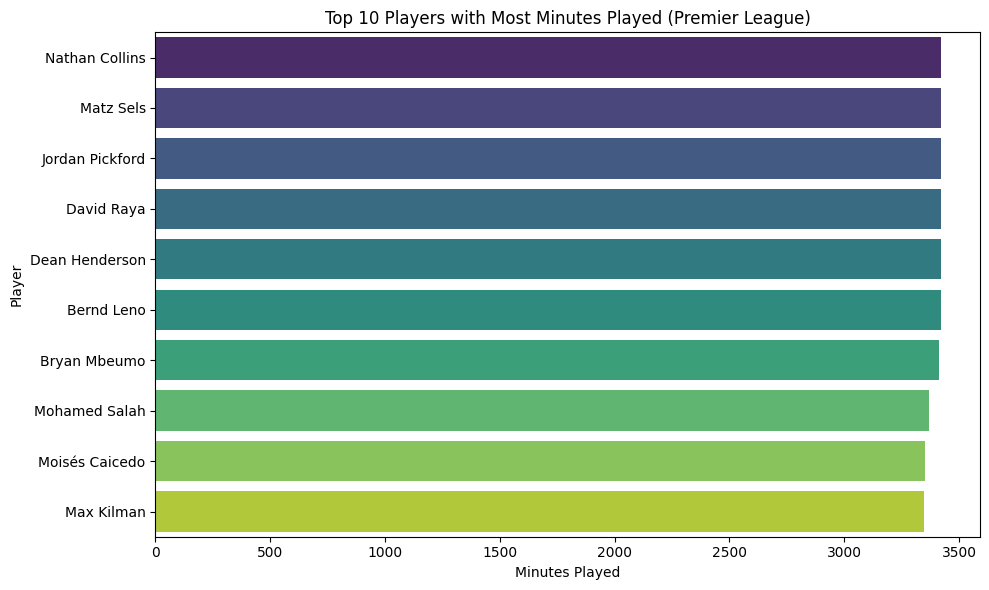

In [4]:
# Visualize top 10 players by minutes played
plt.figure(figsize=(10, 6))
sns.barplot(data=most_minutes, x='Minutes', y='Player', palette='viridis')
plt.title('Top 10 Players with Most Minutes Played (Premier League)')
plt.xlabel('Minutes Played')
plt.ylabel('Player')
plt.tight_layout()

# Save as .png
plt.savefig("outputs/minutes_played.png")
print("Chart saved to outputs/minutes_played.png")

# Show the visual
plt.show()